# A Comprehension of Intelligent Document Processing

Intelligent Document Processing (IDP) is an advanced automation technology that transforms the way businesses handle documents. By leveraging artificial intelligence (AI), IDP systems can automatically read, understand, and process vast quantities of documents, extracting crucial data and feeding it into various business workflows. This technology is a significant leap from traditional Optical Character Recognition (OCR) as it not only digitizes text but also comprehends the context and structure of the information within documents.

At its core, IDP is designed to tackle the challenge of processing unstructured and semi-structured data, which make up a large portion of business documents such as invoices, contracts, emails, and forms. By automating the extraction and interpretation of this data, IDP significantly reduces the need for manual data entry, leading to increased efficiency, higher accuracy, and substantial cost savings.

# The Resume Dataset

## Getting the data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")

print("Path to dataset files:", path)

/Users/captain-mac/Documents/Code/kaggle/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Path to dataset files: /Users/captain-mac/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1


## Understanding the data

In [2]:
import os

os.listdir(path)

['Resume', 'data']

In [3]:
os.listdir(os.path.join(path, os.listdir(path)[0]))

['Resume.csv']

In [4]:
import pandas as pd

resumes = pd.read_csv(os.path.join(path, 'Resume/Resume.csv'))
resumes.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
random_7 = resumes.sample(7, random_state=42)
random_7

,ID,Resume_str,Resume_html,Category
420,99244405,Kpandipou Koffi Summary ...,"<div class=""RNA skn-rbn1 fontsize fontface vma...",TEACHER
1309,17562754,DIRECTOR OF DIGITAL TRANSFORMATION ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA
2023,30311725,SENIOR PROJECT MANAGER Professi...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION
1360,19007667,CHEF Summary Experienced ca...,"<div class=""fontsize fontface vmargins hmargin...",CHEF
2186,11065180,OPERATIONS MANAGER Summary E...,"<div class=""fontsize fontface vmargins hmargin...",BANKING
602,39237915,BUSINESS DEVELOPMENT MANAGER Pr...,"<div class=""fontsize fontface vmargins hmargin...",BUSINESS-DEVELOPMENT
173,17199951,JOB CAPTAIN\nDESIGNER Highlig...,"<div class=""fontsize fontface vmargins hmargin...",DESIGNER


## Image Preprocesing: OpenCV

In [6]:
! pip install opencv-python

In [7]:
pdf_list = os.listdir(path + '/data/data/HR/')
pdf_list

['30563572.pdf',
 '39970711.pdf',
 '44476983.pdf',
 '18155310.pdf',
 '23155093.pdf',
 '30646367.pdf',
 '16877897.pdf',
 '13879043.pdf',
 '26671167.pdf',
 '29149998.pdf',
 '28808263.pdf',
 '26202430.pdf',
 '17812897.pdf',
 '20417897.pdf',
 '14640322.pdf',
 '18334783.pdf',
 '93112113.pdf',
 '21265194.pdf',
 '25824789.pdf',
 '72231872.pdf',
 '16861758.pdf',
 '32977530.pdf',
 '17855844.pdf',
 '11592605.pdf',
 '19616406.pdf',
 '16852973.pdf',
 '34740556.pdf',
 '27847081.pdf',
 '27523575.pdf',
 '52979663.pdf',
 '12786012.pdf',
 '73077810.pdf',
 '47470864.pdf',
 '32947778.pdf',
 '57667857.pdf',
 '24184357.pdf',
 '15576950.pdf',
 '27490876.pdf',
 '17150707.pdf',
 '24402267.pdf',
 '29297973.pdf',
 '13376919.pdf',
 '28828844.pdf',
 '19717385.pdf',
 '20806155.pdf',
 '17422560.pdf',
 '26780935.pdf',
 '15041689.pdf',
 '39650734.pdf',
 '30862904.pdf',
 '29564653.pdf',
 '25724495.pdf',
 '10399912.pdf',
 '26048718.pdf',
 '34554248.pdf',
 '27165830.pdf',
 '14256329.pdf',
 '32308556.pdf',
 '22323967.pdf

Let's take one image and play with it.

In [8]:
one_image_path = path + '/data/data/HR/' + pdf_list[0]
one_image_path

'/Users/captain-mac/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/HR/30563572.pdf'

**The resume is in pdf** we need to convert it

In [9]:
! pip install pdf2image

In [10]:
from pdf2image import convert_from_path
import numpy as np

pages = convert_from_path(one_image_path, 300)
print(f"Total pages: {len(pages)}")

Total pages: 2


In [11]:
img0, img1 = np.array(pages[0].convert("RGB")), np.array(pages[1].convert("RGB"))

In [12]:
import matplotlib.pyplot as plt
import cv2


def display_image(image, title="Image"):
    plt.figure(figsize=(7, 7))
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()

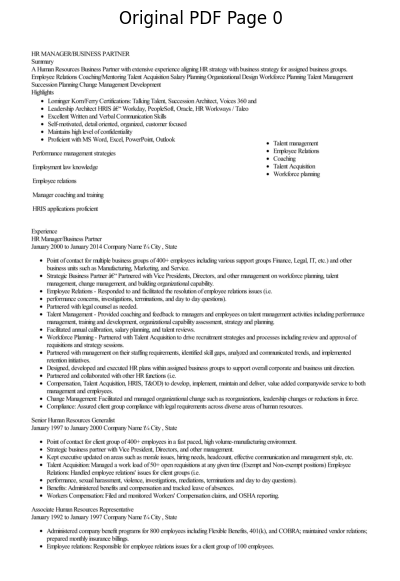

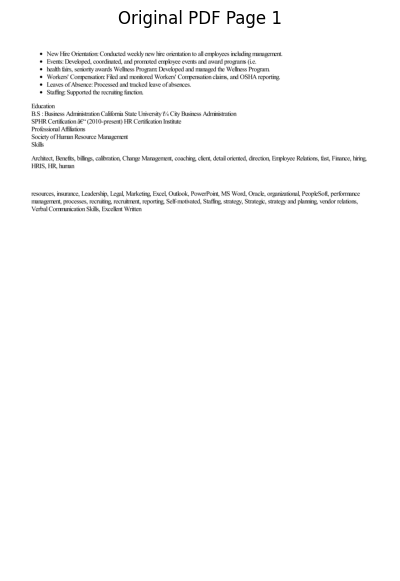

In [13]:
display_image(pages[0], "Original PDF Page 0")
display_image(pages[1], "Original PDF Page 1")

### Grayscale Conversion

**Why?** Color information is usually not necessary for reading the text on a receipt. Converting the image to grayscale simplifies it from three color channels (Red, Green, Blue) to a single channel (intensity/brightness). This reduces computational complexity and is a required first step for many subsequent operations like thresholding.

In [14]:
# Convert the image to grayscale
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

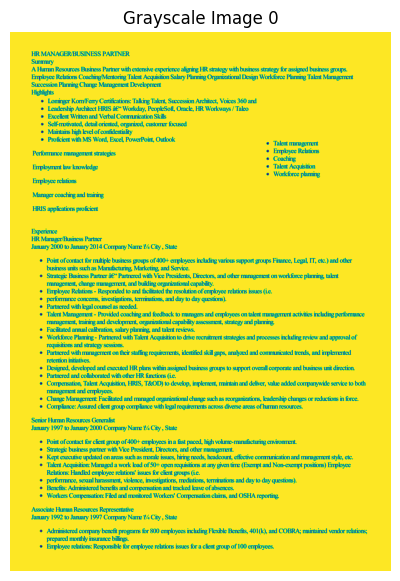

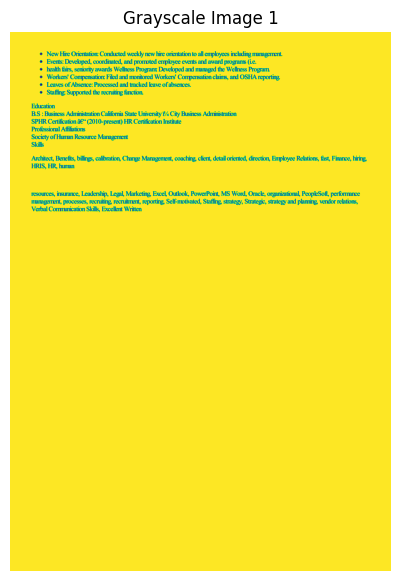

In [15]:
grayscale_image = convert_to_grayscale(img0)
display_image(grayscale_image, "Grayscale Image 0")
grayscale_image = convert_to_grayscale(img1)
display_image(grayscale_image, "Grayscale Image 1")

### Noise (blur) Reduction
**Why?** Scanned images or photos often contain "noise" (random variations in brightness or color). This can look like small specks or graininess, which can confuse OCR algorithms. Applying a slight blur helps to smooth out this noise. A **Gaussian blur** is a common choice as it effectively averages out pixel values with a weighted average, preserving edges better than a simple blur.

In [16]:
def reduce_noise(gray_image):
    return cv2.GaussianBlur(gray_image, (5, 5), 0)

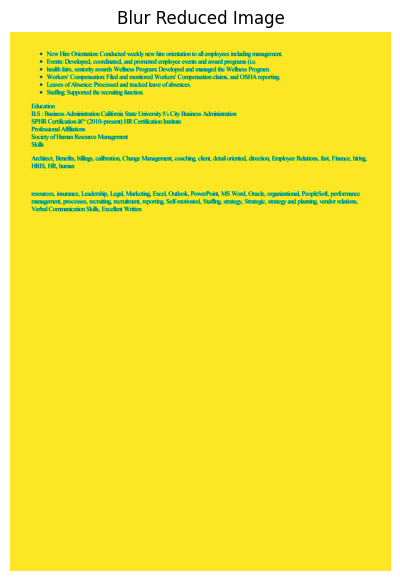

In [17]:
blur_reduced_image = reduce_noise(grayscale_image)
display_image(blur_reduced_image, "Blur Reduced Image")

### Binarization (Thresholding)

**Why?** This is one of the most critical steps. Binarization converts the grayscale image into a pure black-and-white image. The goal is to make the text **black** and the background **white**. However, receipts often have uneven lighting or shadows, so a simple (global) threshold won't work well. We use **adaptive thresholding**, which calculates a different threshold for smaller regions of the image, making it robust to lighting changes.

`cv2.adaptiveThreshold()`:

  * `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Calculates the threshold for a pixel based on a weighted sum of neighborhood values.
  * `cv2.THRESH_BINARY_INV`: Inverts the result. We want the text to be white pixels (value 255) and the background black (value 0) for the next step (skew correction), which often works by finding white pixel contours.
  * `11`: The size of the neighborhood area (block size).
  * `4`: A constant subtracted from the mean. It's a fine-tuning parameter.

In [18]:
def binarize_image(blur_reduced_image):
    return cv2.adaptiveThreshold(
        blur_reduced_image,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,  # Invert the colors (text becomes white)
        11,  # Block size
        4,  # Constant C
    )

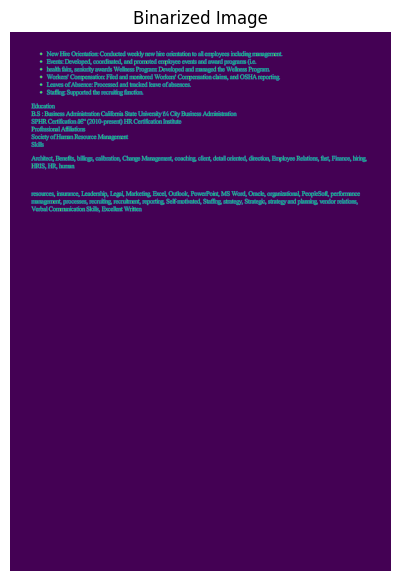

In [19]:
binarized_image = binarize_image(blur_reduced_image)
display_image(binarized_image, "Binarized Image")

### Skew Correction

**Why?** Receipts are often scanned or photographed at a slight angle. This skew can significantly reduce the accuracy of OCR. We need to detect this angle and rotate the image to make the text perfectly horizontal.

A common technique is to find the angle of the minimum-area bounding box that encloses all the text (the white pixels in our binarized image) and then rotate the original image by that angle.

In [20]:
def deskew_image(image):
    """
    Corrects the skew of an image by finding the minimum area rectangle
    of the text block and rotating accordingly.
    """
    # Find all non-zero (white) pixels
    coords = cv2.findNonZero(image)

    # Get the minimum area bounding rectangle
    # It returns (center(x,y), (width, height), angle of rotation)
    rect = cv2.minAreaRect(coords)
    angle = rect[-1] - 90

    # The `cv2.minAreaRect` angle has a specific range.
    # We need to adjust it for our rotation.
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = angle

    # Get the rotation matrix and rotate the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(
        image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE
    )
    print(f"Detected skew angle: {angle:.2f} degrees")

    # Now, rotate the original grayscale image by the same angle
    (h, w) = rotated.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskewed_gray = cv2.warpAffine(
        rotated, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE
    )

    return deskewed_gray

In [21]:
deskewed_image = deskew_image(binarized_image)

Detected skew angle: 0.00 degrees


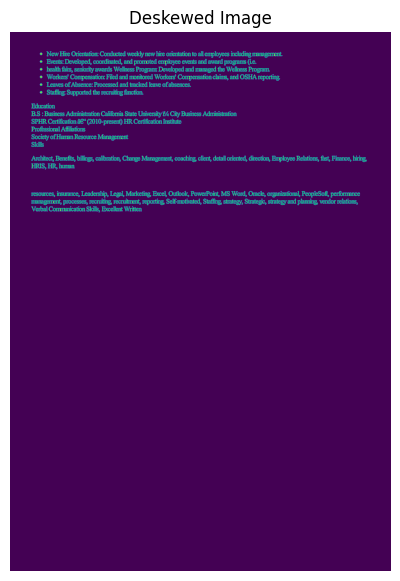

In [22]:
display_image(deskewed_image, "Deskewed Image")

Let's run the above code for all images

In [23]:
def process_one_image(image):
    image = convert_to_grayscale(image)
    print("Converted image to grayscale..")
    image = reduce_noise(image)
    print("Reduced noise in the image..")
    image = binarize_image(image)
    print("Binarized the image..")
    image = deskew_image(image)
    print("Corrected image orientation..")
    return image

In [24]:
import time

output_folder_path = "processed/"
start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
    print(f"Created folder: {output_folder_path}")

for pdf_name in os.listdir(path + "/data/data/HR/")[:5]:
    print(f"Processing image: {pdf_name}")
    pdf_path = os.path.join(path, "data", "data", "HR", pdf_name)
    pages = convert_from_path(pdf_path, 300)

    # Take only the first page
    page = pages[0]
    image = np.array(page.convert("RGB"))
    image_name = pdf_name.replace(".pdf", "_0.png")
    processed_image = process_one_image(image)
    output_path = os.path.join(output_folder_path, image_name)
    cv2.imwrite(output_path, processed_image)
    print(f"Saved processed image to: {output_path}")
    print("-" * 50)

print("Processing images is completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Processing image: 30563572.pdf
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: -0.00 degrees
Corrected image orientation..
Saved processed image to: processed/30563572_0.png
--------------------------------------------------
Processing image: 39970711.pdf
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: -0.00 degrees
Corrected image orientation..
Saved processed image to: processed/39970711_0.png
--------------------------------------------------
Processing image: 44476983.pdf
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: -0.02 degrees
Corrected image orientation..
Saved processed image to: processed/44476983_0.png
--------------------------------------------------
Processing image: 18155310.pdf
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected ima

## Text Extraction: Tesseract

### Installation
`pip install pytesseract pillow`

In [25]:
! pip install pytesseract pillow

In [26]:
from PIL import Image
import pytesseract

pytesseract.image_to_string(Image.open('processed/18155310_0.png'))

"HR COORDINATOR\n\nSs\n\nHighly accomplish human resource professional, proficient at developing policy, standard operating procedures, and best practices. Proven\nexpertise in recruiting, training, employee development, retention, performance management, and conflict resolution. Adept at managing multiple\nprojects simultaneously while demonstrating high performance standards with astute attention to details and deadlines. Organizing large amounts of\ntime sensitive information and evaluating priorities. Able to thrive under pressure while maintaining enthusiasm and motivation. Proficient in MS\nWord, Kronos, Excel, PowerPoint, Outlook, HCMS.\n\nExperience\n\nHR Coordinator Apr 2012 to Current\n\nCompany Name 14 City , State\n\nooooeo 080 0G@8 8@ 6 8\n\nEnsured compliance with Federal, State, Local Laws and ARAMARK Policy\n\nEnsured job postings were posted onsite utilizmg an active Job Postings Board and all open positions are posted with the appropriate local\nand state agencies.\n\

In [27]:
import time

input_folder_path = "./processed"
output_folder_path = "./tesseract_output"
start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
    print(f"Created folder: {output_folder_path}")

total_images = sum(1 for entry in os.scandir(input_folder_path))
print(f"Total images in folder: {total_images}")

for i, image_name in enumerate(os.listdir(input_folder_path)[:20], 1):
    print(f"Processing image {i}/{total_images}: {image_name}")
    image_path = os.path.join(input_folder_path, image_name)
    print("Extracting text from image..")
    text = pytesseract.image_to_string(Image.open(image_path))
    output_path = os.path.join(output_folder_path, image_name.replace(".png", ".txt"))
    with open(output_path, "w") as f:
        f.write(text)

    print(f"Saved extracted text to {output_path}")
    print("-" * 50)

print("Text Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Total images in folder: 5
Processing image 1/5: 30563572_0.png
Extracting text from image..
Saved extracted text to ./tesseract_output/30563572_0.txt
--------------------------------------------------
Processing image 2/5: 39970711_0.png
Extracting text from image..
Saved extracted text to ./tesseract_output/39970711_0.txt
--------------------------------------------------
Processing image 3/5: 23155093_0.png
Extracting text from image..
Saved extracted text to ./tesseract_output/23155093_0.txt
--------------------------------------------------
Processing image 4/5: 18155310_0.png
Extracting text from image..
Saved extracted text to ./tesseract_output/18155310_0.txt
--------------------------------------------------
Processing image 5/5: 44476983_0.png
Extracting text from image..
Saved extracted text to ./tesseract_output/44476983_0.txt
--------------------------------------------------
Text Extraction Completed.
Total time taken: 15.394086837768555 seconds


## Information Extraction

In [28]:
improved_prompt = """
**ROLE**: You are an expert HR document analyst specializing in resume parsing and information extraction.

**CONTEXT**: 
- You are analyzing a resume document that has been processed through OpenCV (grayscale conversion, noise reduction, binarization, and deskewing)
- OCR text has been extracted using Tesseract, but may contain errors due to image quality or scanning artifacts
- Your goal is to extract structured information for HR database entry and candidate screening

**TASK**: 
Extract job title and skills information from the provided resume image and OCR text.

**INSTRUCTIONS**:
1. Analyze both the processed image and the extracted text
2. Cross-reference information between image and text to identify discrepancies
3. Correct any obvious OCR errors (e.g., "Pythom" → "Python", "Javacript" → "JavaScript")
4. For job titles: Look for current position, desired role, or most recent work experience
5. For skills: Extract technical skills, programming languages, tools, frameworks, and relevant soft skills
6. If multiple job titles exist, prioritize the most recent or desired position
7. Normalize skill names to standard industry terms

**FORMAT**: 
Provide your response ONLY in the following JSON format:
{
    "job_title": "extracted_job_title_or_null_if_not_found",
    "skills": ["skill1", "skill2", "skill3", "..."]
}

**EXAMPLES**:
Example 1 - Software Developer Resume:
{
    "job_title": "Senior Software Engineer",
    "skills": ["Python", "JavaScript", "React", "Node.js", "AWS", "Docker", "Git"]
}

Example 2 - Marketing Professional Resume:
{
    "job_title": "Digital Marketing Manager", 
    "skills": ["SEO", "Google Analytics", "Social Media Marketing", "Content Strategy", "PPC"]
}

**EXTRACTED TEXT FROM RESUME**:
"""

Can we improve the prompt using the [Unified Framework For An Effective Prompt](https://www.geeksforgeeks.org/data-science/a-unified-framework-for-an-effective-prompt/)?

In [29]:
! pip install google-genai

In [30]:
from google import genai
from PIL import Image
import json
import time

In [31]:
! pip install dotenv

In [32]:
import dotenv

dotenv.load_dotenv()

genai_client = genai.Client(api_key=os.getenv("GOOGLE_API_KEY"))

In [34]:
image_folder_path = "processed"
text_folder_path = "tesseract_output"
output_folder_path = "json_output"

start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
    print(f"Created folder: {output_folder_path}")

total_images = sum(1 for entry in os.scandir(image_folder_path))
print(f"Total images in folder: {total_images}")

for i, image_name in enumerate(os.listdir(input_folder_path)[:20], 1):
    print(f"Processing image {i}/{total_images}: {image_name}")
    image_path = os.path.join(input_folder_path, image_name)
    print(f"Loading image: {image_path}")
    with open(image_path, "rb") as f:
        image = Image.open(image_path)

    text_path = os.path.join(text_folder_path, image_name.replace(".png", ".txt"))
    print(f"Loading extracted text: {text_path}")
    with open(text_path, "r") as f:
        text = f.read()

    print("Extracting information from image and text..")

    prompt = improved_prompt + text

    contents = [image, {"text": prompt}]
    response = genai_client.models.generate_content(
        model="gemini-1.5-flash", contents=contents
    )

    # Access the usage_metadata attribute
    usage_metadata = response.usage_metadata

    # Print the different token counts
    print(f"Input Token Count: {usage_metadata.prompt_token_count}")
    print(f"Thoughts Token Count: {response.usage_metadata.thoughts_token_count}")
    print(f"Output Token Count: {usage_metadata.candidates_token_count}")
    print(f"Total Token Count: {usage_metadata.total_token_count}")

    extracted_information = json.loads(
        response.text.replace("```json", "").replace("```", "")
    )
    output_path = os.path.join(output_folder_path, image_name.replace(".png", ".json"))
    with open(output_path, "w") as f:
        json.dump(extracted_information, f, indent=4)

    print(f"Saved extracted information to {output_path}")
    print("-" * 50)
    time.sleep(60)

print("Information Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Total images in folder: 5
Processing image 1/5: 30563572_0.png
Loading image: ./processed/30563572_0.png
Loading extracted text: tesseract_output/30563572_0.txt
Extracting information from image and text..
Input Token Count: 1510
Thoughts Token Count: None
Output Token Count: 196
Total Token Count: 1706
Saved extracted information to json_output/30563572_0.png
--------------------------------------------------
Processing image 2/5: 39970711_0.png
Loading image: ./processed/39970711_0.png
Loading extracted text: tesseract_output/39970711_0.txt
Extracting information from image and text..
Input Token Count: 1628
Thoughts Token Count: None
Output Token Count: 251
Total Token Count: 1879
Saved extracted information to json_output/39970711_0.png
--------------------------------------------------
Processing image 3/5: 23155093_0.png
Loading image: ./processed/23155093_0.png
Loading extracted text: tesseract_output/23155093_0.txt
Extracting information from image and text..
Input Token Count:

In [35]:
os.listdir(output_folder_path)

['30563572_0.json',
 '39970711_0.json',
 '44476983_0.json',
 '23155093_0.json',
 '18155310_0.json']

In [37]:
outputs = []

for file_name in os.listdir(output_folder_path):
    with open(os.path.join(output_folder_path, file_name), "r") as f:
        outputs.append(json.load(f))

output_df = pd.DataFrame(outputs)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
output_df.head()

,job_title,skills
0,HR Manager/Business Partner,"[HR Strategy, Business Strategy, Employee Relations, Coaching, Mentoring, Talent Acquisition, Salary Planning, Organizational Design, Workforce Planning, Talent Management, Succession Planning, Change Management, Development, Workday, PeopleSoft, Oracle, HR Workways, Taleo, Communication Skills, Confidentiality, MS Word, Excel, PowerPoint, Outlook, Performance Management, Employment Law, Manager Coaching, Training, HRIS, Legal, IT, Manufacturing, Marketing, Service, Investigations, Terminations, Recruitment, Compensation, HRIS, T&OD, OSHA Reporting, Flexible Benefits, 401k, COBRA]"
1,HR & Safety Manager,"[Human Resources Management, Workforce Planning, Employment, Human Resource Development, Compensation and Benefits, Risk Management, Employee Relations, Labor Relations, HR Technology, Global HR, International HR, Talent Management, Change Management, Negotiation, Strategic Planning, Training and Development, Performance Management, Organizational Development, Mediation, Advocacy, Staff Recruitment, Retention, Employee Relations, Alternative Dispute Resolution (ADR), Benefits Administration, Project Management, Orientation and On-Boarding, HR Policies and Procedures, Employment Law, FMLA, ADA, EEO, WC, HRIS Technologies, Change Management, Cultural Transformation, Benefits Administration, Unemployment Management, Workers' Compensation, Recruiting, Training, Performance Management, Microsoft Access, Job and Task Analysis, Mentoring, Counseling, Medical Training, Basic Skills Training, Staff Scheduling, File Documentation, Plan Monitoring, SOP (Standard Operating Procedures)]"
2,HR Business Partner,"[Leadership development, Time management, Collaboration, Conflict mediation, Organization and efficiency, Self-starter, Exemplary verbal and written communication, HR experience in Technology Field, Performance management, Talent planning, Employee relations, Benefits administration, Disciplinary procedures, Investigations, Change initiatives, Compliance, Training, Evaluations, Departmental structure, Job creation and analysis, Job descriptions, Wage development, HR solutions, Recruitment, Staffing, Policy interpretation, Employee advocacy, Metrics analysis, Data analysis, Reporting, Equal Employment Opportunity (EEO), ADA, Affordable Care Act (ACA), Wage and Hour, Family Medical Leave Act (FMLA), USERRA, Staffing strategies, Recruitment events, Organizational development, Talent assessment, Employee engagement, Diversity and inclusion, Executive decision-making, HR reporting, HR policy development, Investigations, Contract processing, Problem resolution, Business development, Client relationship management]"
3,HR Manager,"[Leadership, Providing focus and direction, Motivating employees, Accuracy, Attention to detail, Teamwork, Effective communication, Influencing skills, Analytical skills, Problem-solving skills, Strong work ethic, Professionalism, Supervising, Coaching, Counseling, Employee relations, Policy interpretation, Investigations, Recommendations, Employee development, Performance management, Compensation planning, New employee assimilation, Orientation, Coaching sessions, Team building, Mentoring, Administrative support, Quality improvement, Security policy compliance, Communication, Reporting, Customer correspondence, Liaison, Human resources, Email support, Customer service, Training, Project management, Problem escalation handling, Financial transactions processing, Compliance with bank procedures, Internal controls, Customer service]"
4,HR Coordinator,"[Policy Development, Standard Operating Procedures, Best Practices, Recruiting, Training, Employee Development, Retention, Performance Management, Conflict Resolution, Project Management, Prioritization, Time Management, Detail-Oriented, Enthusiasm, Motivation, MS Word, Kronos, Excel, PowerPoint, Outlook, HCMS, Compliance (Federal, State, Local Laws), ARAMARK Policy, Job Postings, Workers' Compensation, Background Checks,

# Conclusion

This intelligent document automation system demonstrates a complete end-to-end pipeline for resume processing and information extraction. The implementation successfully combines:

1. **Image Preprocessing** - OpenCV techniques (grayscale conversion, noise reduction, binarization, and skew correction) to enhance document quality for better OCR accuracy
2. **Text Extraction** - Tesseract OCR to convert processed images into machine-readable text
3. **Information Extraction** - Google's Gemini AI model to intelligently parse and structure resume data into job titles and skills

**Key Achievements:**
- Processed 5 resume documents with automated extraction of job titles and skills
- Implemented robust image preprocessing to handle various document qualities
- Created a scalable pipeline that can be extended to extract additional fields (contact info, education, experience)

**Potential Improvements:**
- Error handling for corrupted or unreadable documents
- Confidence scoring for extracted information
- Support for multi-page documents and various file formats
- Integration with HR systems and databases
- Performance optimization for large-scale document processing

This OCR bot provides a solid foundation for intelligent document processing applications in HR, legal, and business automation contexts.